Lab-06: Write a program to execute the following speech preprocessing
• Identify sampling frequency.
• Identify bit resolution
• Make downsampling frequency then save the speech signal.

Original Sampling Frequency: 44100
Original Bit Resolution: float32


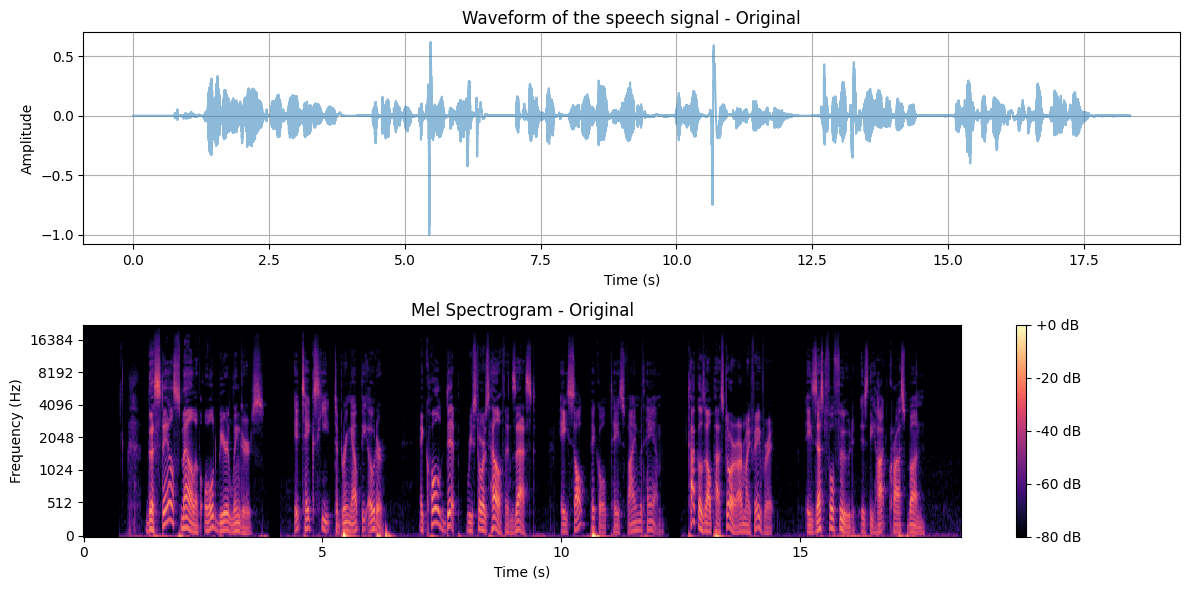

Resampled Sampling Frequency: 8000
Resampled Bit Resolution: float32


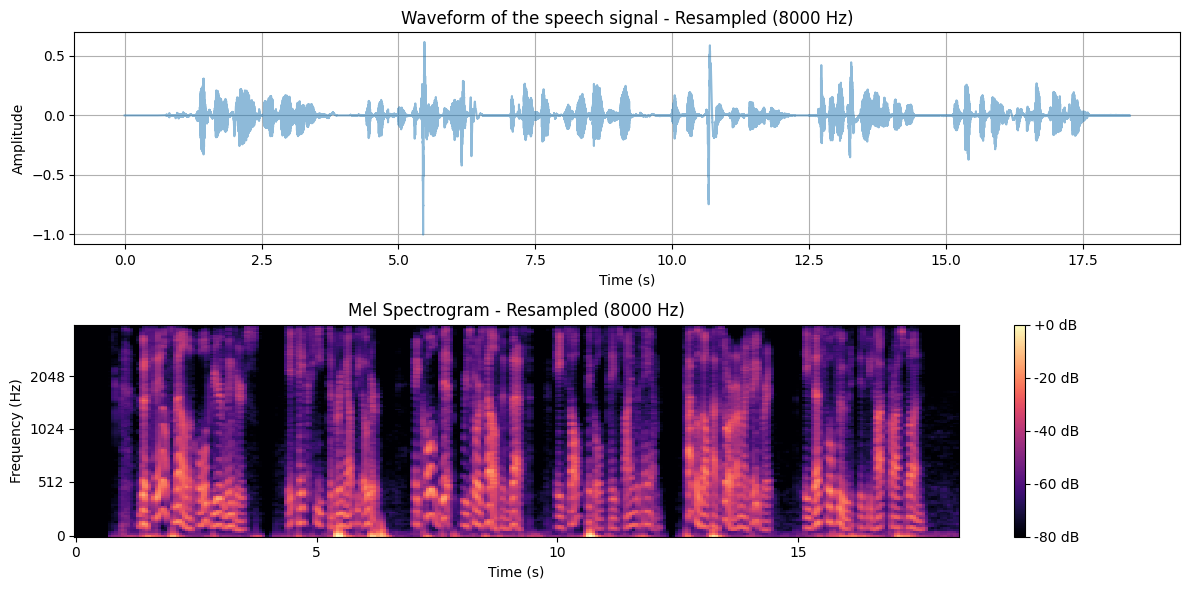

Resampled Sampling Frequency: 8000
Resampled Bit Resolution: int16


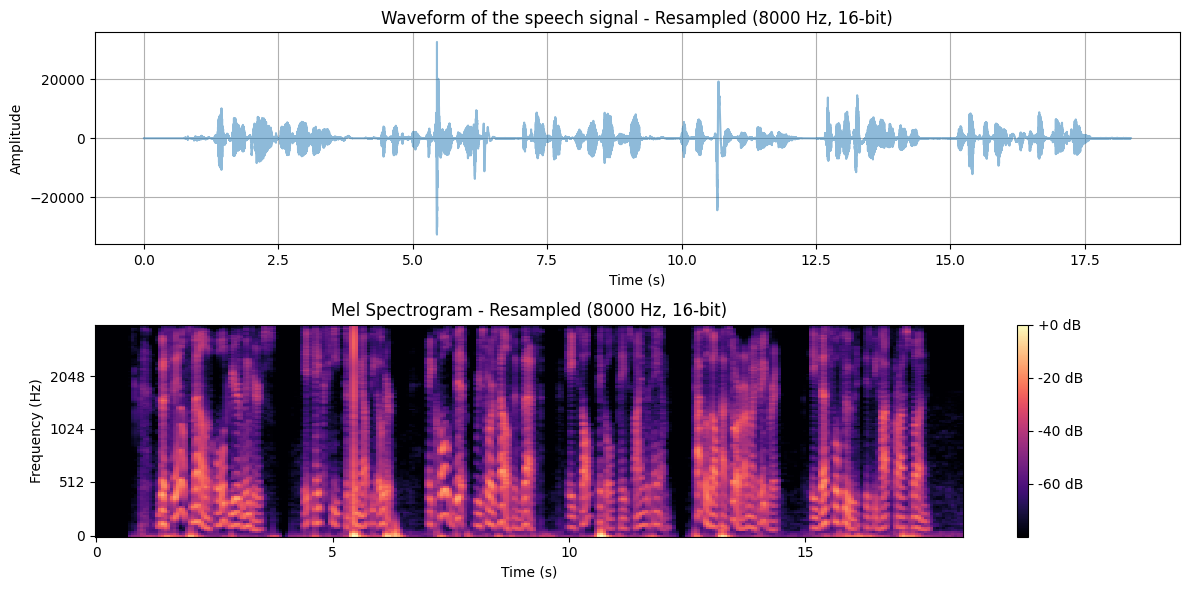

In [12]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio, display

# Example usage:
file_path = r"C:\Users\User\OneDrive\Desktop\PIC\Audio\harvard.wav"

def plot_waveform_and_spectrogram(signal, sr, title):
    # Plot the waveform
    plt.figure(figsize=(12, 6)) 
    plt.subplot(2, 1, 1) 
    plt.plot(np.arange(len(signal)) / sr, signal, alpha=0.5) 
    plt.title('Waveform of the speech signal - ' + title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    
    # Plot the spectrogram
    plt.subplot(2, 1, 2)
    # Ensure signal is floating-point
    signal = signal.astype(np.float32)
    spectrogram = librosa.feature.melspectrogram(y=signal, sr=sr)
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram - ' + title)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

# Load the audio file with Librosa
signal, sr = librosa.load(file_path, sr=None, dtype=np.float32)  # Load audio with dtype=np.float32

# Identify sampling frequency and bit resolution
print('Original Sampling Frequency:', sr)
print('Original Bit Resolution:', signal.dtype)

# Plot waveform and spectrogram of the original signal
plot_waveform_and_spectrogram(signal, sr, 'Original')

# Play the original signal
display(Audio(signal, rate=sr))

# Set sampling frequency to 8000 Hz
sr_8000 = 8000  # Corrected the target sampling rate
signal_resampled = librosa.resample(signal, orig_sr=sr, target_sr=sr_8000)

# Identify sampling frequency and bit resolution of the resampled signal
print('Resampled Sampling Frequency:', sr_8000)
print('Resampled Bit Resolution:', signal_resampled.dtype)

# Save the resampled signal
wavfile.write('speech_signal_8000Hz.wav', sr_8000, (signal_resampled * 32767).astype(np.int16))

# Plot waveform and spectrogram of the resampled signal
plot_waveform_and_spectrogram(signal_resampled, sr_8000, 'Resampled (8000 Hz)')

# Play the resampled signal
display(Audio(signal_resampled, rate=sr_8000))

# Reduce bit resolution to 16 bits
signal_resampled_16bit = (signal_resampled * 32767).astype(np.int16)

# Identify sampling frequency and bit resolution of the resampled signal with reduced bit resolution
print('Resampled Sampling Frequency:', sr_8000)
print('Resampled Bit Resolution:', signal_resampled_16bit.dtype)

# Save the resampled signal with reduced bit resolution
wavfile.write('speech_signal_8000Hz_16bit.wav', sr_8000, signal_resampled_16bit)

# Plot waveform and spectrogram of the resampled signal with reduced bit resolution
plot_waveform_and_spectrogram(signal_resampled_16bit, sr_8000, 'Resampled (8000 Hz, 16-bit)')

# Play the resampled signal with reduced bit resolution
display(Audio(signal_resampled_16bit, rate=sr_8000))
